### Problem 1: Small dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

#### 1. Loading the Data

In [7]:
X = np.load('../../data/p1/X.npy')
X.shape

(511, 45768)

In [15]:
X[:, 0].max()

np.float64(11.941397591320595)

#### 2. Transform the Data

In [17]:
X_log = np.log2(X+1)
X_log[:, 0].max()

np.float64(3.6939215228197613)

#### 3. Principal Components and Explained Variance

In [34]:
pcaX = PCA()
pcaX.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [36]:
pcaX.explained_variance_ratio_[0]

np.float64(0.42779670983572654)

In [37]:
pcaX_log = PCA()
pcaX_log.fit(X_log)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [38]:
pcaX_log.explained_variance_ratio_[0]

np.float64(0.1388756487082619)

In [39]:
cum_var = np.cumsum(pcaX.explained_variance_ratio_)
n_components_85 = np.argmax(cum_var >= 0.85) + 1
print("PCs needed:", n_components_85)

PCs needed: 36


In [40]:
cum_var = np.cumsum(pcaX_log.explained_variance_ratio_)
n_components_85 = np.argmax(cum_var >= 0.85) + 1
print("PCs needed:", n_components_85)

PCs needed: 339


#### 4. Plotting without Visualization Technique

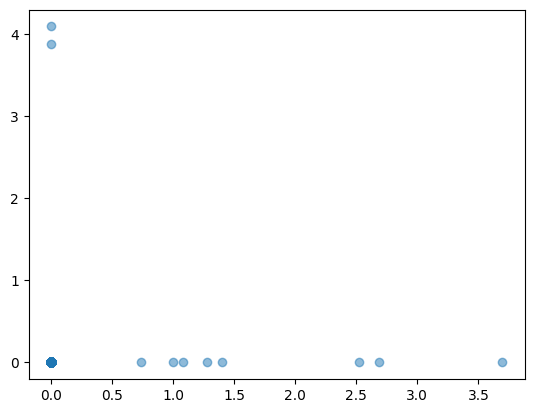

In [62]:
# initial data
plt.scatter(X_log[:, 0], X_log[:, 1], alpha=0.5)
plt.show()

#### 5. PCA

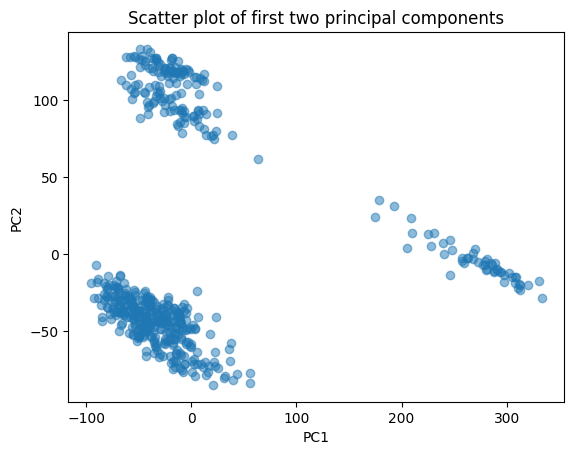

In [63]:
# PCA 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log)

# Scatter plot PC1 and PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()

#### 6. MDS

/home/leonel-unix/workspace/MITx-6.419x-data-analysis/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


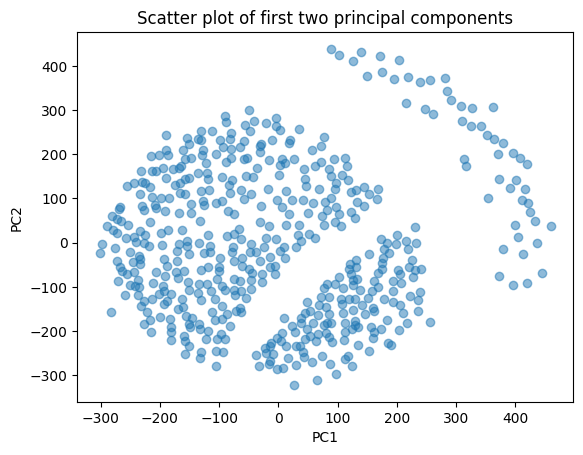

In [64]:
# MDS
mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")
X_mds = mds.fit_transform(X_log)

# Scatter plot PC1 and PC2
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()

#### 7. T-SNE

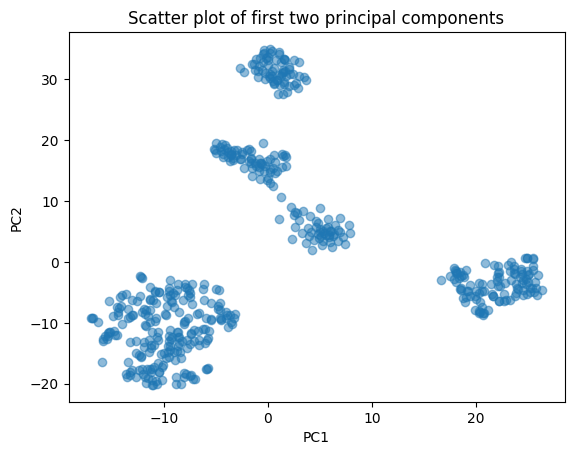

In [69]:
# PCA 50 components
pca50 = PCA(n_components=50, random_state=42)
X_pca50 = pca50.fit_transform(X_log)

# t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_pca50)

# Scatter plot PC1 and PC2
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of first two principal components")
plt.show()